In [ ]:
import os

os.chdir(os.path.split(os.getcwd())[0])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from ascad_tools import load_data

np.random.seed(42)

X, y, *_ = load_data("data/raw/ASCAD.h5", "Profiling")

def get_trace(X, y, byte_value):
    mask = y == byte_value
    idx = np.random.randint(0, np.sum(mask))
    return X[mask][idx], idx


def plot_trace(X, y, byte_value):
    trace, idx = get_trace(X, y, byte_value)

    _, ax = plt.subplots(figsize=(9, 2.5), constrained_layout=True)
    ax.set_title(f"Trace {idx} (label = 0x{byte_value:02X}) ")

    ax.plot(trace, linewidth=1.2)
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time")
    ax.set_xlim(0, X.shape[1])
    ax.grid(True, linestyle="--", alpha=0.8)
    return ax.figure

_ = plot_trace(X, y, byte_value=0x00)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/raw/ASCAD.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

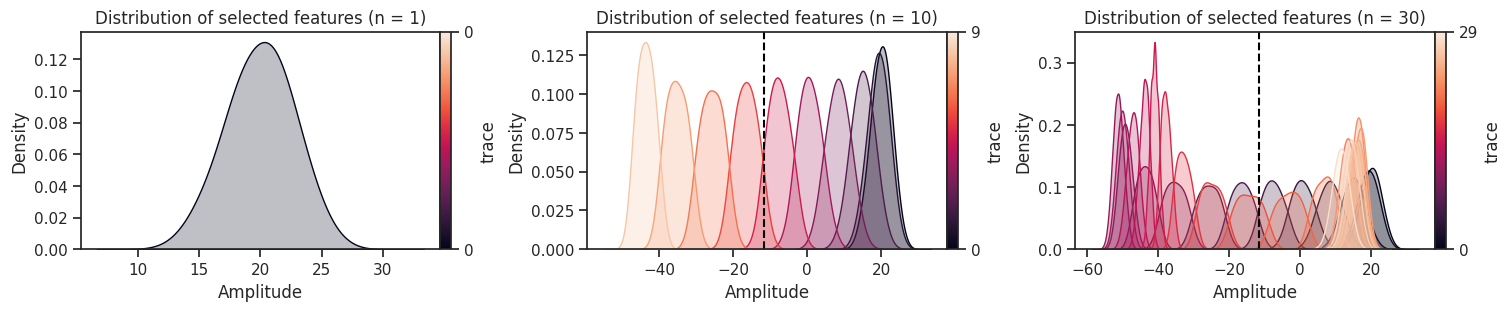

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")

def feature_histogram(X, idx, mean=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)

    idx = sorted(idx)
    cmap = sns.color_palette("rocket", as_cmap=True)

    for i in idx:
        sns.kdeplot(X[:, i], color=cmap(i / len(idx)),
                    fill=True, bw_adjust=3.5, ax=ax)
        ax.set_xlabel("Amplitude")
        ax.set_ylabel("Density")

    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label="trace", pad=0)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels([idx[0], idx[-1]])

    if mean:
        ax.axvline(X.mean(), color="black", linestyle="--")

    ax.set_title(f"Distribution of features (n = {len(idx)})")
    return ax.figure

fig, ax = plt.subplots(1, 3, figsize=(15, 3), constrained_layout=True)
_ = feature_histogram(X, idx=[0], ax=ax[0])
_ = feature_histogram(X, idx=range(10), ax=ax[1], mean=True)
_ = feature_histogram(X, idx=range(30), ax=ax[2], mean=True)

Cechy ewidentnie podlegają rozkładowi normalnemu.

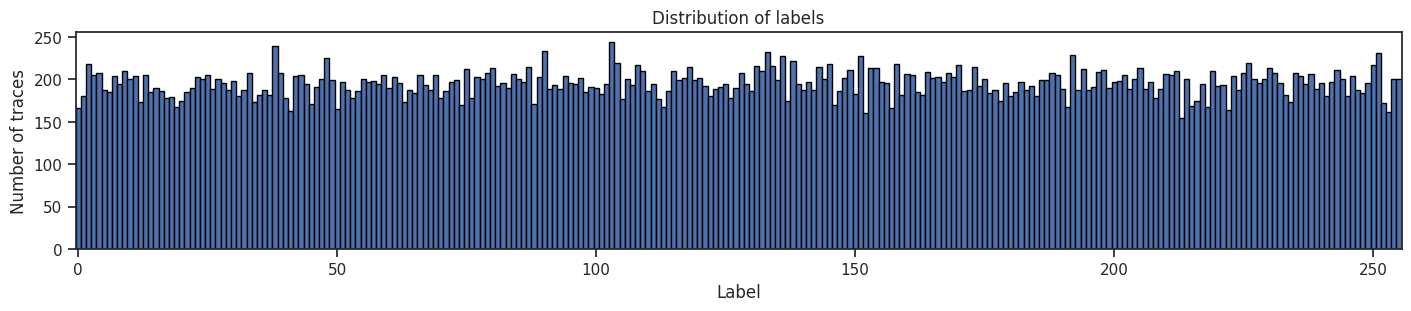

In [33]:
fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.bar(x=np.arange(256), height=np.bincount(y), width=1.0, edgecolor="black")
ax.set_xlim(-0.5, 255.5)
ax.set_xlabel("Label")
ax.set_ylabel("Number of traces")
_ = ax.set_title("Distribution of labels")

Klasy są zbalansowane.

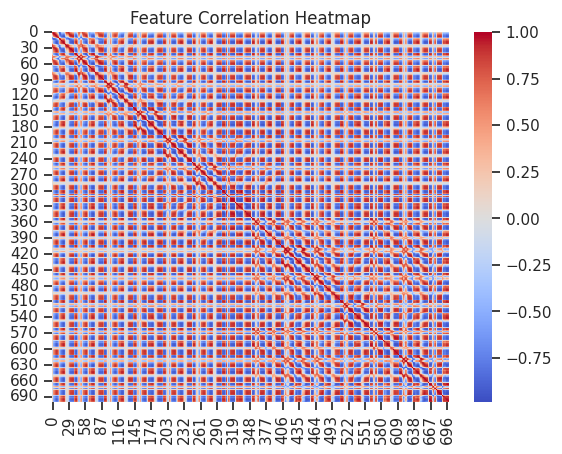

In [34]:
import seaborn as sns

sns.heatmap(np.corrcoef(X.T), cmap="coolwarm", center=0)
_ = plt.title("Feature Correlation Heatmap")

Cechy znajdujące się w podobnym momencie cykli procesora są silnie skorelowane liniowo.